In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
file_path ='Case Study - Transaction.csv'
transaction = pd.read_csv(file_path, sep=';')

transaction.head()
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [16]:
transaction_ = transaction.drop_duplicates(subset=["TransactionID"], keep=False)
print(transaction_)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  01/01/2022        P3   7500    4        30000   
1          TR16356         165  01/01/2022        P9  10000    7        70000   
2           TR1984         183  01/01/2022        P1   8800    4        35200   
3          TR35256         160  01/01/2022        P1   8800    7        61600   
4          TR41231         386  01/01/2022        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  31/12/2022       P10  15000    5        75000   
5016        TR5604         271  31/12/2022        P2   3200    4        12800   
5017       TR81224          52  31/12/2022        P7   9400    6        56400   
5018       TR85016          18  31/12/2022        P8  16000    3        48000   
5019       TR85684          55  31/12/2022        P8  16000    1        16000   

      StoreID  
0          

In [17]:
file_path ='Case Study - Customer.csv'
Customer = pd.read_csv(file_path, sep=';')

pd.merge(transaction_,Customer,on='CustomerID')

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,TR67395,328,22/01/2022,P8,16000,3,48000,11,36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,36,0,Married,"10,53"
3,TR97172,328,21/05/2022,P1,8800,5,44000,1,36,0,Married,"10,53"
4,TR57013,328,15/09/2022,P7,9400,6,56400,1,36,0,Married,"10,53"
...,...,...,...,...,...,...,...,...,...,...,...,...
4792,TR27321,441,11/08/2022,P4,12000,2,24000,10,19,0,Single,"2,66"
4793,TR16832,441,25/08/2022,P6,18000,1,18000,6,19,0,Single,"2,66"
4794,TR81827,441,05/09/2022,P5,4200,3,12600,2,19,0,Single,"2,66"
4795,TR61352,441,28/09/2022,P5,4200,3,12600,1,19,0,Single,"2,66"


In [18]:
file_path ='Case Study - Product.csv'
product = pd.read_csv(file_path, sep=';')
pd.merge(transaction_,product,on='ProductID')

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500
1,TR14355,203,02/01/2022,P3,7500,4,30000,10,Crackers,7500
2,TR16534,421,02/01/2022,P3,7500,2,15000,14,Crackers,7500
3,TR10346,322,03/01/2022,P3,7500,4,30000,4,Crackers,7500
4,TR36491,117,03/01/2022,P3,7500,4,30000,12,Crackers,7500
...,...,...,...,...,...,...,...,...,...,...
4792,TR25297,243,29/12/2022,P8,16000,2,32000,10,Oat,16000
4793,TR72715,227,29/12/2022,P8,16000,2,32000,5,Oat,16000
4794,TR21461,191,30/12/2022,P8,16000,1,16000,9,Oat,16000
4795,TR85016,18,31/12/2022,P8,16000,3,48000,13,Oat,16000


In [19]:
file_path ='Case Study - Store.csv'
store = pd.read_csv(file_path, sep=';')
pd.merge(transaction_,store,on='StoreID')

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR76340,287,01/01/2022,P4,12000,4,48000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR97336,233,01/01/2022,P7,9400,2,18800,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR7826,181,02/01/2022,P1,8800,10,88000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR36491,117,03/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,TR48093,128,28/12/2022,P2,3200,7,22400,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
4793,TR8560,15,28/12/2022,P9,10000,6,60000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
4794,TR45738,328,29/12/2022,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"
4795,TR8580,427,30/12/2022,P10,15000,1,15000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403"


In [20]:
customer_grouped = transaction.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Count the number of transactions for each customer
    'Qty': 'sum',              # Sum the 'Qty' for each customer
    'TotalAmount': 'sum'      # Sum the 'Total amount' for each customer
}).reset_index()

customer_grouped.rename(columns={
    'TransactionID': 'TransactionCount',
    'Qty': 'TotalQty',
    'TotalAmount': 'TotalAmount'
}, inplace=True)

print(customer_grouped.head())

   CustomerID  TransactionCount  TotalQty  TotalAmount
0           1                17        60       623300
1           2                13        57       392300
2           3                15        56       446200
3           4                10        46       302500
4           5                 7        27       268600


In [21]:
# Assuming you have already created the 'customer_grouped' DataFrame as shown in your code

# Print the summary statistics for the 'customer_grouped' DataFrame
print(customer_grouped.describe())


       CustomerID  TransactionCount    TotalQty    TotalAmount
count  447.000000        447.000000  447.000000     447.000000
mean   224.000000         11.230425   40.930649  362512.304251
std    129.182042          3.245302   12.756679  124634.279184
min      1.000000          3.000000   10.000000   92100.000000
25%    112.500000          9.000000   32.000000  271750.000000
50%    224.000000         11.000000   40.000000  354200.000000
75%    335.500000         14.000000   50.000000  441200.000000
max    447.000000         21.000000   79.000000  846700.000000


In [27]:
selected_features = ['TransactionCount', 'TotalQty', 'TotalAmount']
X = customer_grouped[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_grouped['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the cluster centers and their sizes
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Cluster Sizes:")
print(customer_grouped['Cluster'].value_counts())

Cluster Centers:
[[ 0.01596497  0.02020577  0.00606469]
 [-1.06279778 -1.09848333 -1.06930914]
 [ 1.27502524  1.31103349  1.30119696]]
Cluster Sizes:
0    202
1    135
2    110
Name: Cluster, dtype: int64


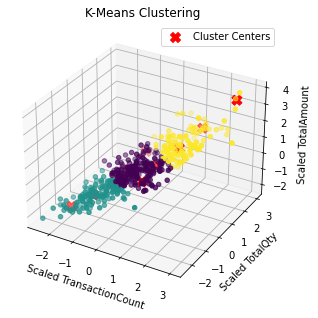

In [33]:
# Plot the clusters if you have three selected features (TransactionCount, TotalQty, TotalAmount)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], 
           X_scaled[:, 1], 
           X_scaled[:, 2], c=customer_grouped['Cluster'], cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], 
           marker='X', s=100, c='red', label='Cluster Centers')
ax.set_xlabel('Scaled TransactionCount')
ax.set_ylabel('Scaled TotalQty')
ax.set_zlabel('Scaled TotalAmount')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

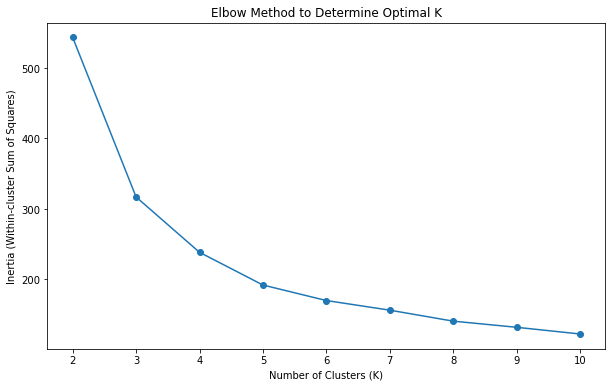

In [28]:
k_range = range(2, 11)

# Initialize an empty list to store the inertia values
inertia = []

# Calculate inertia for different values of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()